# Determination of number and ubication of warehouses of relief goods in Metropolitan Lima
### Applied Data Science Capstone by IBM/Coursera

View complete in https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/f6841aba-cbf1-477a-b899-641c2a228fed/view?access_token=629925a38cdec6fa048d1515b9daa2bd1a7f0ecfcb39cc0cfc0bb6d7e61526b2

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis and discusion](#analysis)
6. [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

Every year disasters cause suffering in different parts of the world and humanitarian logistic has a vital role in minimizing the suffering of the people. 
One of the challenges that humanitarian logistic has to face is the uncertainty of the demand, and determine the location of warehouses of relief good is a important work because it will affect directly in the speed of the distribution of relief goods postdisaster, these goood could be water, food, medicines, etc.

Metropolitan Lima, formed by Lima and Callao, is located in the The Pacific Ring of Fire and an earthquake could happen in anytime.
A short term decision to minimize the suffering of the possible casualties is to determine the number and best location for warehouses of relief good and data science can help to solve this problem properly using clustering tools considerating that first the relief goods are distributed from the warehouse to each borought.

In this project I will use my data science knowledge to recommend to Goverment of Perú the number and localization of warehouses of relief good in the city of Metropolitan Lima. 

## 2. Data <a name="data"></a>

The following data is required to solve the problem:

* List of Boroughs of Lima (available in http://webinei.inei.gob.pe:8080/sisconcode/ubigeo/listaBusquedaUbigeoPorDescripcion.htm?versionCategoriaPK=5-1&nivel=1&descripcion=&strVersion=2016)
* Geodata of each Boroughs (available in http://webinei.inei.gob.pe:8080/sisconcode/ubigeo/listaBusquedaUbigeoPorDescripcion.htm?versionCategoriaPK=5-1&nivel=1&descripcion=&strVersion=2016)
* Population of each Boroughs (available in http://censos2017.inei.gob.pe/redatam/)

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

### List of Boroughts

In this section is shown a list of boroughts.

In [2]:
#Ubigeo is the denomination of borought in Peru

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_c7f8bc0427ed49ca8a07f4eb957ac237 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HGeoUQMadY1-CA6rQt9py4Gws_nrngcTuLhmJxNvl_xx',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c7f8bc0427ed49ca8a07f4eb957ac237.get_object(Bucket='coursera-donotdelete-pr-qnwyssos6whpcs',Key='Peru_Ubigeo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ubigeo = pd.read_csv(body)
df_ubigeo.head(10)

,Ubigeo,Departamento,Provincia,Distrito
0,70101,Callao,Prov. Const. del Callao,Callao
1,70102,Callao,Prov. Const. del Callao,Bellavista
2,70103,Callao,Prov. Const. del Callao,Carmen de la Legua Reynoso
3,70104,Callao,Prov. Const. del Callao,La Perla
4,70105,Callao,Prov. Const. del Callao,La Punta
5,70106,Callao,Prov. Const. del Callao,Ventanilla
6,70107,Callao,Prov. Const. del Callao,Mi Peru
7,150101,Lima,Lima,Lima
8,150102,Lima,Lima,Ancon
9,150103,Lima,Lima,Ate


In [3]:
df_ubigeo.shape

(50, 4)

### Latitude and longitude of each borought

In this section is shown the latitude and longitude of each borought.

In [4]:
# Latitude and longitude of Metropolitan Lima

body = client_c7f8bc0427ed49ca8a07f4eb957ac237.get_object(Bucket='coursera-donotdelete-pr-qnwyssos6whpcs',Key='Peru_Geodata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_geodata = pd.read_csv(body)
df_geodata.head(10)

,Ubigeo,Latitud,Longitud
0,70101,-12.05417,-77.12889
1,70102,-12.06250,-77.12917
2,70103,-12.04639,-77.09694
3,70104,-12.06556,-77.10806
4,70105,-12.07278,-77.16333
5,70106,-11.87056,-77.12139
6,70107,-11.85528,-77.12361
7,150101,-12.04556,-77.03111
8,150102,-11.77361,-77.17611
9,150103,-12.02611,-76.91917


In [5]:
df_geodata.shape

(50, 3)

### Population of each borought

In this section is shown the population of each borought.

In [6]:
body = client_c7f8bc0427ed49ca8a07f4eb957ac237.get_object(Bucket='coursera-donotdelete-pr-qnwyssos6whpcs',Key='Peru_Poblacion.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_population = pd.read_csv(body)
df_population.head(10)

,Ubigeo,Poblacion
0,70101,479418
1,70102,77679
2,70103,44377
3,70104,62387
4,70105,326
5,70106,331119
6,70107,48047
7,150101,273142
8,150102,67232
9,150103,624172


In [7]:
df_population.shape

(50, 2)

### Merge of tables

In this section is merged the previus tables.

In [8]:
df_lima = pd.merge(df_ubigeo,df_geodata,on='Ubigeo')
df_lima1 = pd.merge(df_lima,df_population,on='Ubigeo')

df_lima1.rename(columns={'Ubigeo':'Code'},inplace=True)
df_lima1.rename(columns={'Departamento':'Region'},inplace=True)
df_lima1.rename(columns={'Provincia':'Province'},inplace=True)
df_lima1.rename(columns={'Distrito':'Borough'},inplace=True)
df_lima1.rename(columns={'Latitud':'Latitude'},inplace=True)
df_lima1.rename(columns={'Longitud':'Longitude'},inplace=True)
df_lima1.rename(columns={'Poblacion':'Population'},inplace=True)

df_lima1.head(10)

,Code,Region,Province,Borough,Latitude,Longitude,Population
0,70101,Callao,Prov. Const. del Callao,Callao,-12.05417,-77.12889,479418
1,70102,Callao,Prov. Const. del Callao,Bellavista,-12.06250,-77.12917,77679
2,70103,Callao,Prov. Const. del Callao,Carmen de la Legua Reynoso,-12.04639,-77.09694,44377
3,70104,Callao,Prov. Const. del Callao,La Perla,-12.06556,-77.10806,62387
4,70105,Callao,Prov. Const. del Callao,La Punta,-12.07278,-77.16333,326
5,70106,Callao,Prov. Const. del Callao,Ventanilla,-11.87056,-77.12139,331119
6,70107,Callao,Prov. Const. del Callao,Mi Peru,-11.85528,-77.12361,48047
7,150101,Lima,Lima,Lima,-12.04556,-77.03111,273142
8,150102,Lima,Lima,Ancon,-11.77361,-77.17611,67232
9,150103,Lima,Lima,Ate,-12.02611,-76.91917,624172


In [9]:
df_lima1.shape

(50, 7)

### Map of borough in Metropolitan Lima

In this section is shown the map of boroughts, the size of the bubbles depends od the population of the borought.

In [10]:
lima_map = folium.Map(location=[-12.0431805,-77.0282364],zoom_start=10)

for lat,lng,Borough,Region,Population in zip(df_lima1['Latitude'],df_lima1['Longitude'],df_lima1['Borough'],df_lima1['Region'],df_lima1['Population']):
    label = '{}, {}'.format(Borough, Region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=Population/100000,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(lima_map)
    
lima_map

## 3. Methodology <a name="methodology"></a>

In this project we will direct our efforts on determiate the number and best location of warehouses of relief goods in Metropolitan Lima.

1. We have collected the required **data: location of each bororugh of Metropolitan Lima**.

2. We will be determinate the optimal **number of warehouses** in Metropolitan Lima using the elbow method for clustering (k-mean).

3. We  will be determinate the optimal **location of each warehouse** using the center of the cluster.

## 4. Analysis and discusion<a name="analysis"></a>


### Optimal number of Warehouses

In [11]:
import matplotlib.pyplot as plt

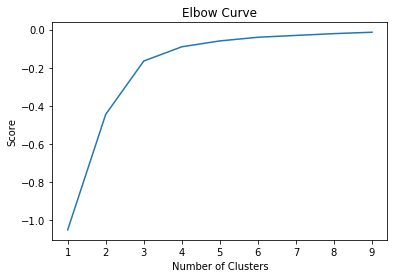

In [12]:
#Elbow curve 

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_lima1[['Latitude']]
X_axis = df_lima1[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much. 

In [13]:
k=3
lima_cluster = df_lima1.drop(['Code','Region','Province','Borough','Population'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(lima_cluster)
kmeans.labels_
df_lima1.insert(0, 'Cluster', kmeans.labels_)

In [14]:
df_lima1.head(10)

,Cluster,Code,Region,Province,Borough,Latitude,Longitude,Population
0,0,70101,Callao,Prov. Const. del Callao,Callao,-12.05417,-77.12889,479418
1,0,70102,Callao,Prov. Const. del Callao,Bellavista,-12.06250,-77.12917,77679
2,0,70103,Callao,Prov. Const. del Callao,Carmen de la Legua Reynoso,-12.04639,-77.09694,44377
3,0,70104,Callao,Prov. Const. del Callao,La Perla,-12.06556,-77.10806,62387
4,0,70105,Callao,Prov. Const. del Callao,La Punta,-12.07278,-77.16333,326
5,2,70106,Callao,Prov. Const. del Callao,Ventanilla,-11.87056,-77.12139,331119
6,2,70107,Callao,Prov. Const. del Callao,Mi Peru,-11.85528,-77.12361,48047
7,0,150101,Lima,Lima,Lima,-12.04556,-77.03111,273142
8,2,150102,Lima,Lima,Ancon,-11.77361,-77.17611,67232
9,0,150103,Lima,Lima,Ate,-12.02611,-76.91917,624172


In [15]:
lima_cluster = folium.Map(location=[-12.0431805,-77.0282364],zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, borough, cluster,population in zip(df_lima1['Latitude'], df_lima1['Longitude'], df_lima1['Borough'], df_lima1['Cluster'], df_lima1['Population']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=Population/100000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lima_cluster)
       
lima_cluster

**Recomendation:** The optimal number of warehouses of relief goods in Metropolitan Lima is 3, in the map we can watch the clusters.

### Optimal location of each warehouse

In [16]:
#Center of cluster

centers = kmeans.cluster_centers_

df_Wahehouse = pd.DataFrame(centers) 

df_Wahehouse.rename(columns={0:'Latitude'},inplace=True)
df_Wahehouse.rename(columns={1:'Longitude'},inplace=True)

df_Wahehouse

,Latitude,Longitude
0,-12.072582,-77.009557
1,-12.354206,-76.814683
2,-11.842132,-77.116295


In [17]:
lima_warehouse = df_Wahehouse
kmeans = KMeans(n_clusters = k,random_state=0).fit(lima_warehouse)
kmeans.labels_
lima_warehouse.insert(0, 'Cluster', kmeans.labels_)

In [18]:
df_Wahehouse

,Cluster,Latitude,Longitude
0,0,-12.072582,-77.009557
1,1,-12.354206,-76.814683
2,2,-11.842132,-77.116295


In [19]:
lima_warehouse = folium.Map(location=[-12.0431805,-77.0282364],zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, cluster in zip(df_Wahehouse['Latitude'], df_Wahehouse['Longitude'], df_Wahehouse['Cluster']):
    label = '{}, {}'.format(lat, lon)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lima_warehouse)
       
lima_warehouse

**Recomendation:** The optimal location of warehouses of relief goods in Metropolitan Lima are shown in the map. 

In [20]:
#View maps in https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/f6841aba-cbf1-477a-b899-641c2a228fed/view?access_token=629925a38cdec6fa048d1515b9daa2bd1a7f0ecfcb39cc0cfc0bb6d7e61526b2

## 5. Conclusion and future directions
 <a name="conclusion"></a>

Based on the elbow curve, in my opinion, the optimal number of warehouses of relief goods in Metropolitan Lima is 3, and it will be built near of the next coordinates:

1. Warehouse 1: (-12.072582, -77.009557)
2. Warehouse 2: (-12.354206, -76.814683)
3. Warehouse 3: (-11.842132, -77.116295)

Final decission of optimal warehouses location will be made by stakeholders based on disponible areas to built the warehouse.